# Code for examining mixture model output
### E Flynn
### Last Updated: 10/12/2017

In [5]:
source('mixture_model_scripts/model_utils.R')


Loading required package: MASS
Loading required package: Matrix
Loading required package: mnormt
Loading required package: qqman

For example usage please run: vignette('qqman')

Citation appreciated but not required:
Turner, S.D. qqman: an R package for visualizing GWAS results using Q-Q and manhattan plots. biorXiv DOI: 10.1101/005165 (2014).

Loading required package: rstan
Loading required package: ggplot2
Loading required package: StanHeaders
rstan (Version 2.15.1, packaged: 2017-04-19 05:03:57 UTC, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())


## Test Models Output -- BMI

In [2]:
load('data/test_opt_21001.RData')
#print(f1$par)
#print(f2$par)
f1.bmi <- f1
f2.bmi <- f2
m1.bmi.pi <- c(f1.bmi$par["pi[1]"], f1.bmi$par["pi[2]"])
m1.bmi.Sigma <- c(f1.bmi$par['Sigma[1,1]'], f1.bmi$par['Sigma[1,2]'], 
              f1.bmi$par['Sigma[2,1]'], f1.bmi$par['Sigma[2,2]'])

m1.bmi.pi
m1.bmi.Sigma
getRg(matrix(m1.bmi.Sigma, c(2,2))) # seems high...

pi[1]     pi[2] 
0.6066391 0.3933609

Sigma[1,1]   Sigma[1,2]   Sigma[2,1]   Sigma[2,2] 
3.515963e-05 3.670878e-05 3.670878e-05 3.832621e-05

[1] 0.9999999

In [3]:
m2.bmi.pi <- c(f2.bmi$par["pi[1]"], f2.bmi$par["pi[2]"], 
               f2.bmi$par["pi[3]"], f2.bmi$par["pi[4]"])
m2.bmi.S <- c(f2.bmi$par['sigmasq[1]'], f2.bmi$par['sigmasq[2]'], 
              f2.bmi$par['sigmasq[3]'], f2.bmi$par['sigmasq[4]'])

m2.bmi.pi
m2.bmi.S

pi[1]        pi[2]        pi[3]        pi[4] 
9.804276e-01 1.105793e-07 1.747682e-07 1.957208e-02

sigmasq[1]   sigmasq[2]   sigmasq[3]   sigmasq[4] 
0.4145169314 0.4871791135 0.0007997785 0.0008516804

In [10]:
trait <- '21001'

# load all the data
all.dat.bmi <- lapply(1:22, function(x){ getData(as.character(x), trait)})

# reformat the data
dat.reform.bmi <- reformatData(all.dat.bmi, "quant")
f.bmi <- dat.reform.bmi$`1`
m.bmi <- dat.reform.bmi$`2`

filt.dat.bmi <- filterSE(f.bmi, m.bmi, 'quant')
filt.f.bmi <-filt.dat.bmi$`1`
filt.m.bmi <- filt.dat.bmi$`2`
dat.filt.bmi <- extractDataStan(filt.f.bmi, filt.m.bmi)

In [11]:
posteriorSNP <- function(dat, p, sigmasq){
    B.dat <- dat$dat$B
    SE.dat <- dat$dat$SE
    N <- dat$dat$N
    posteriors <- lapply(1:N, function(i) computePosterior(B.dat[i,], SE.dat[i,], p, sigmasq))
    posterior.df <- data.frame(apply(do.call(rbind, posteriors), c(1,2), as.numeric))
    posterior.df$category <- apply(posterior.df, 1, function(x){return(which.max(x))})

    posterior.df$SNP <- dat$snp
    colnames(posterior.df) <- c("p1", "p2", "p3", "p4", "category", "SNP")

    #posterior.df <- data.frame(apply(posterior.df, c(1,2), unlist)) 
    return(posterior.df)
}


                

In [14]:
snp.tab.bmi <- posteriorSNP(dat.filt.bmi, as.vector(m2.bmi.pi), as.vector(m2.bmi.S))

head(snp.tab.bmi)

table(snp.tab.bmi$category)
summary(snp.tab.bmi)

p1,p2,p3,p4,category,SNP
0.9780661,2.705370e-07,3.074750e-07,0.02193330,1,rs115991721
0.9889014,8.475599e-08,9.007747e-08,0.01109843,1,rs12562034
0.9733038,7.695253e-08,3.495878e-07,0.02669573,1,rs4040617
0.9532647,1.003673e-07,7.209033e-07,0.04673449,1,rs79373928
0.9801701,1.686036e-07,1.143025e-07,0.01982961,1,rs59771807
0.9853731,6.315295e-08,1.115627e-07,0.01462668,1,rs116452738



     1      4 
322555  10629 

       p1               p2                  p3                  p4          
 Min.   :0.0000   Min.   :0.000e+00   Min.   :0.000e+00   Min.   :0.007303  
 1st Qu.:0.9493   1st Qu.:7.250e-08   1st Qu.:1.150e-07   1st Qu.:0.016059  
 Median :0.9775   Median :1.072e-07   Median :1.690e-07   Median :0.022484  
 Mean   :0.9281   Mean   :3.510e-07   Mean   :5.920e-07   Mean   :0.071877  
 3rd Qu.:0.9839   3rd Qu.:2.193e-07   3rd Qu.:3.430e-07   3rd Qu.:0.050747  
 Max.   :0.9927   Max.   :8.797e-04   Max.   :4.709e-03   Max.   :1.000000  
    category         SNP           
 Min.   :1.000   Length:333184     
 1st Qu.:1.000   Class :character  
 Median :1.000   Mode  :character  
 Mean   :1.096                     
 3rd Qu.:1.000                     
 Max.   :4.000                     

Inference for Stan model: model1.
1 chains, each with iter=1000; warmup=0; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=1000.

              mean     sd    2.5%     50%   97.5%
Sigma[1,1] 0.00003 0.0000 0.00003 0.00003 0.00003
Sigma[1,2] 0.00004 0.0000 0.00003 0.00004 0.00004
Sigma[2,1] 0.00004 0.0000 0.00003 0.00004 0.00004
Sigma[2,2] 0.00004 0.0000 0.00004 0.00004 0.00004
pi[1]      0.60762 0.0035 0.60110 0.60756 0.61452
pi[2]      0.39238 0.0035 0.38548 0.39244 0.39890

Approximate samples were drawn using VB(meanfield) at Wed Oct 11 09:15:26 2017.


We recommend genuine 'sampling' from the posterior distribution for final inferences!


[1] 0.6076213 0.3923787

3.299608e-05,3.569759e-05
3.569759e-05,4.146828e-05


[1] 0.9650497

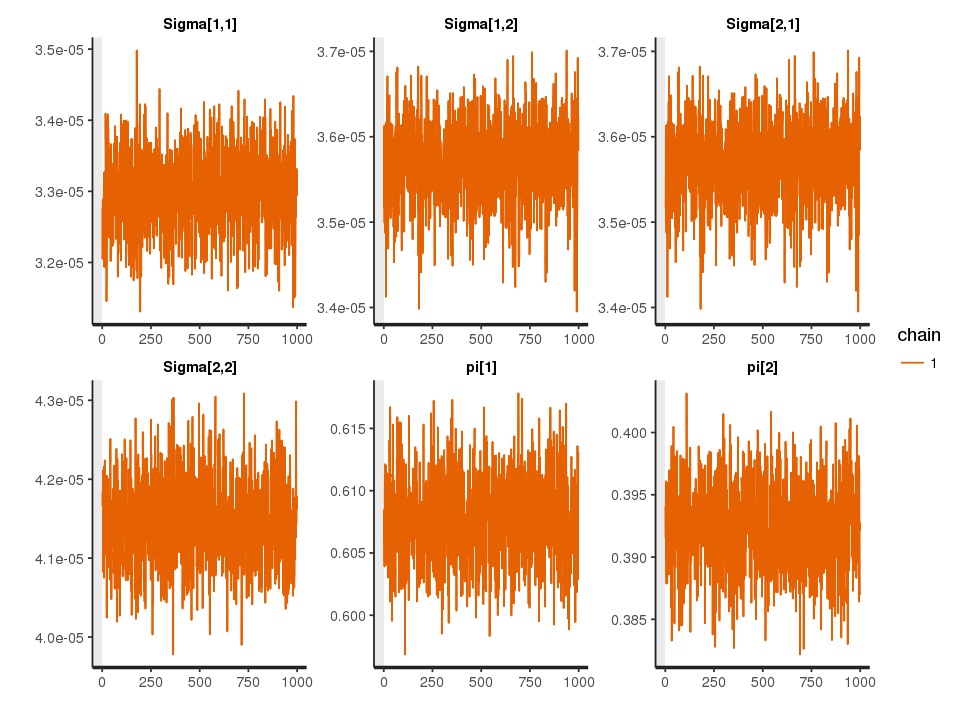

In [15]:
# look at variational bayes fit for comparison
load('data/test_vb_21001.RData')

f1.v.bmi <- f1.v
f2.v.bmi <- f2.v

print(f1.v.bmi, pars=c("Sigma", "pi"), probs=c(0.025, 0.5, 0.975), digits_summary=5)
options(repr.plot.width=8, repr.plot.height=6)
traceplot(f1.v.bmi, pars = c("Sigma", "pi"), inc_warmup = TRUE, nrow = 2)

m1.v.bmi.pi <- getPi(f1.v.bmi)
m1.v.bmi.Sigma <- getSigma(f1.v)
m1.v.bmi.pi
m1.v.bmi.Sigma
getRg(matrix(m1.v.bmi.Sigma, c(2,2))) # seems high...

In [17]:
print(f2.v.bmi, pars=c("sigmasq", "pi"), probs=c(0.025, 0.5, 0.975), digits_summary=5)
m2.v.bmi.pi <- getPi(f2.v.bmi)
m2.v.bmi.S <- getVars(f2.v.bmi) # should we be looking at mean or median?
m2.v.bmi.pi
m2.v.bmi.S
# the confidence interval around sigmasq[2] is terrible!

Inference for Stan model: model2.
1 chains, each with iter=1000; warmup=0; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=1000.

                mean         sd    2.5%     50%      97.5%
sigmasq[1]   0.49100    0.24536 0.18591 0.42972    1.11950
sigmasq[2] 473.52731 6158.14401 0.00015 0.48606 1348.38600
sigmasq[3]   0.00081    0.00002 0.00078 0.00081    0.00085
sigmasq[4]   0.00085    0.00002 0.00081 0.00085    0.00089
pi[1]        0.98097    0.00058 0.97983 0.98099    0.98209
pi[2]        0.00002    0.00000 0.00001 0.00002    0.00003
pi[3]        0.00001    0.00000 0.00000 0.00001    0.00002
pi[4]        0.01900    0.00058 0.01788 0.01899    0.02014

Approximate samples were drawn using VB(meanfield) at Wed Oct 11 10:44:56 2017.


We recommend genuine 'sampling' from the posterior distribution for final inferences!


[1] 9.809746e-01 1.727805e-05 6.284443e-06 1.900182e-02

[1] 4.910037e-01 4.735273e+02 8.138933e-04 8.507495e-04

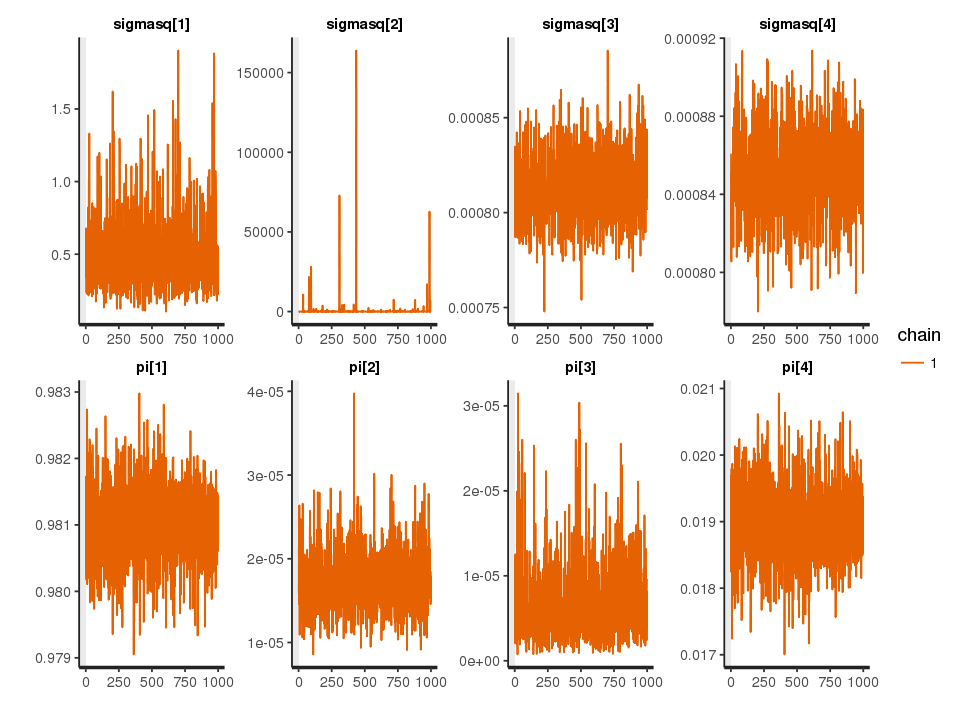

In [12]:
options(repr.plot.width=8, repr.plot.height=6)
traceplot(f2.v.bmi, pars = c("sigmasq", "pi"), inc_warmup = TRUE, nrow = 2)

In [18]:
snp.tab.bmi.v <- posteriorSNP(dat.filt.bmi, as.vector(m2.v.bmi.pi), as.vector(m2.v.bmi.S))

head(snp.tab.bmi.v)

table(snp.tab.bmi.v$category)
summary(snp.tab.bmi.v)

p1,p2,p3,p4,category,SNP
0.9786269,4.259148e-05,1.172976e-05,0.02131874,1,rs115991721
0.9892149,1.323700e-05,3.184669e-06,0.01076867,1,rs12562034
0.9740689,1.202318e-05,1.262511e-05,0.02590641,1,rs4040617
0.9545706,1.569316e-05,2.645996e-05,0.04538724,1,rs79373928
0.9807096,2.646382e-05,3.717402e-06,0.01926026,1,rs59771807
0.9858103,9.840874e-06,3.929416e-06,0.01417590,1,rs116452738



     1      4 
322729  10455 

       p1               p2                  p3                  p4         
 Min.   :0.0000   Min.   :0.000e+00   Min.   :0.000e+00   Min.   :0.00708  
 1st Qu.:0.9505   1st Qu.:1.131e-05   1st Qu.:4.020e-06   1st Qu.:0.01558  
 Median :0.9781   Median :1.676e-05   Median :6.090e-06   Median :0.02184  
 Mean   :0.9293   Mean   :5.525e-05   Mean   :2.311e-05   Mean   :0.07060  
 3rd Qu.:0.9844   3rd Qu.:3.438e-05   3rd Qu.:1.263e-05   3rd Qu.:0.04939  
 Max.   :0.9929   Max.   :1.218e-01   Max.   :1.716e-01   Max.   :1.00000  
    category         SNP           
 Min.   :1.000   Length:333184     
 1st Qu.:1.000   Class :character  
 Median :1.000   Mode  :character  
 Mean   :1.094                     
 3rd Qu.:1.000                     
 Max.   :4.000                     

## Test Models Output -- Acquired Hypothyroidism

In [15]:
load('data/test_opt_RH107.RData')
#print(f1$par)
#print(f2$par)
f1.h <- f1
f2.h <- f2
m1.h.pi <- c(f1.h$par["pi[1]"], f1.h$par["pi[2]"])
m1.h.Sigma <- c(f1.h$par['Sigma[1,1]'], f1.h$par['Sigma[1,2]'], 
                f1.h$par['Sigma[2,1]'], f1.h$par['Sigma[2,2]'])

m1.h.pi
m1.h.Sigma
getRg(matrix(m1.h.Sigma, c(2,2))) # also seems high...

m2.h.pi <- c(f2.h$par["pi[1]"], f2.h$par["pi[2]"], 
             f2.h$par["pi[3]"], f2.h$par["pi[4]"])
m2.h.S <- c(f2.h$par['sigmasq[1]'], f2.h$par['sigmasq[2]'], 
            f2.h$par['sigmasq[3]'], f2.h$par['sigmasq[4]'])

m2.h.pi
m2.h.S

pi[1]      pi[2] 
0.98483364 0.01516636

Sigma[1,1]  Sigma[1,2]  Sigma[2,1]  Sigma[2,2] 
0.005011373 0.005029929 0.005029929 0.005048860

[1] 0.9999695

pi[1]        pi[2]        pi[3]        pi[4] 
9.942460e-01 7.600024e-09 4.012886e-07 5.753563e-03

sigmasq[1] sigmasq[2] sigmasq[3] sigmasq[4] 
0.49018179 0.56790689 0.01156761 0.01592692

In [16]:
### load the data

trait <- 'RH107'

# load all the data
all.dat.h <- lapply(1:22, function(x){ getDataBin(as.character(x), trait)})

# reformat data, remove rows that are not shared
dat.reform.h <- reformatData(all.dat.h, "binary")
dat.f.h <- dat.reform.h$`1`
dat.m.h <- dat.reform.h$`2`

filt.dat.h <- filterSE(dat.f.h, dat.m.h, 'binary')
filt.f.h <-filt.dat.h$`1`
filt.m.h <- filt.dat.h$`2`
dat.filt.h <- extractDataStan(filt.f.h, filt.m.h)

snp.tab.h <- posteriorSNP(dat.filt.h, as.vector(m2.h.pi), as.vector(m2.h.S))

             

In [17]:
head(snp.tab.h)

table(snp.tab.h$category)
summary(snp.tab.h)

p1,p2,p3,p4,category,SNP
0.9943495,6.186344e-09,3.525318e-07,0.005650190,1,rs115991721
0.9910369,9.384059e-09,5.879306e-07,0.008962475,1,rs12562034
0.9963493,5.400812e-09,3.024272e-07,0.003650348,1,rs4040617
0.9942043,9.072448e-09,2.968825e-07,0.005795409,1,rs79373928
0.9941393,9.655040e-09,4.436437e-07,0.005860221,1,rs59771807
0.9915860,2.006562e-08,2.708982e-07,0.008413708,1,rs116452738



     1      4 
342176   1076 

       p1               p2                  p3                  p4          
 Min.   :0.0000   Min.   :0.000e+00   Min.   :0.000e+00   Min.   :0.002460  
 1st Qu.:0.9889   1st Qu.:5.460e-09   1st Qu.:2.980e-07   1st Qu.:0.005182  
 Median :0.9938   Median :7.530e-09   Median :3.930e-07   Median :0.006218  
 Mean   :0.9834   Mean   :2.560e-08   Mean   :1.093e-06   Mean   :0.016604  
 3rd Qu.:0.9948   3rd Qu.:1.358e-08   3rd Qu.:6.610e-07   3rd Qu.:0.011108  
 Max.   :0.9975   Max.   :9.823e-05   Max.   :4.646e-03   Max.   :1.000000  
    category         SNP           
 Min.   :1.000   Length:343252     
 1st Qu.:1.000   Class :character  
 Median :1.000   Mode  :character  
 Mean   :1.009                     
 3rd Qu.:1.000                     
 Max.   :4.000                     